# Trabalho Final Probilidade
## Parte 02

## Exibição de gráficos

In [1]:
#Parte 1 - bibliotecas e importação dos arquivos csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import geopandas as gpd
import time
import os
import re
import fileinput
import math    
from math import pi
import plotly
import plotly.graph_objs as go
#import plotly.plotly as py
from ipywidgets import widgets
from datetime import date
#import cufflinks as cf
import plotly.offline
#import cluster
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#cf.go_offline()
#cf.set_config_file(offline=True, world_readable=True)
#init_notebook_mode(connected=True)

# dataset analisado - 2017
dataSet2017 = pd.read_csv("OB_DATA_2017.csv",sep=",",low_memory=False)
# informaçoes de cidades
cidadesBR = pd.read_csv("muniBR.csv",delimiter=',')
dF = pd.DataFrame(dataSet2017)

In [2]:
# Escolha das doenças a serem analisadas pelo campo CAUSABAS
doencas2017 = pd.concat([dF[dF['CAUSABAS'].str.contains('A40')], dF[dF['CAUSABAS'].str.contains('A41')]], ignore_index=True)

In [3]:
# Representação da Idade dos óbitos
doencas2017[doencas2017['IDADE'] > 500]= 500
doencas2017['AGE'] = doencas2017['IDADE'] - 400
doencas2017[doencas2017['AGE'] < 0]=0

# UFs por cidade
doencas2017['CODUF'] = (doencas2017['CODMUNRES']/10000).astype(int)
# regioes por estado
doencas2017['CODREG'] = np.floor(round(doencas2017['CODUF']/10,1)).astype(int)
# Definir o código das regiões com base nas UFs
cidadesBR['CODREG']=np.floor(round(cidadesBR['CodUF']/10,1)).astype(int)

In [4]:
# parte 1 - histograma por Região

doencas2017['Norte']=doencas2017[doencas2017['CODREG']==1]['AGE']
doencas2017['Nordeste']=doencas2017[doencas2017['CODREG']==2]['AGE']
doencas2017['Sudeste']=doencas2017[doencas2017['CODREG']==3]['AGE'] 
doencas2017['Sul']=doencas2017[doencas2017['CODREG']==4]['AGE'] 
doencas2017['CentroOeste']=doencas2017[doencas2017['CODREG']==5]['AGE'] 

colorway = ['#A174C7', '#93D1D6', '#69CC69', '#FF4C5E', '#DBBD8A']

trace1 = go.Histogram(x=doencas2017['Norte'],histnorm='percent', name='Norte',nbinsx=20,opacity=0.6)
trace2 = go.Histogram(x=doencas2017['Nordeste'],histnorm='percent', name='Nordeste',nbinsx=20,opacity=0.6)
trace3 = go.Histogram(x=doencas2017['Sudeste'],histnorm='percent', name='Sudeste',nbinsx=20,opacity=0.6)
trace4 = go.Histogram(x=doencas2017['Sul'],histnorm='percent', name='Sul',nbinsx=20,opacity=0.6)
trace5 = go.Histogram(x=doencas2017['CentroOeste'],histnorm='percent', name='CentroOeste',nbinsx=20,opacity=0.6)
data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title='Histograma de Óbitos CIDs A40 e A41',
    xaxis=dict(
        title='Idade'
    ),
    yaxis=dict(
        title='Percentual do número de óbitos da região'
    ),
    bargap=0.1,
    barmode='overlay',colorway=colorway
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename='histObitos.html')

'histObitos.html'

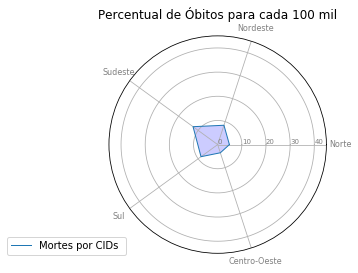

In [5]:
# Gráfico de Teia

# Contabilizacao de mortes por CID como causa primaria - regiao
obREGs = doencas2017['CODREG'].value_counts().sort_index()
propOB = []
propOB100 = []
for i in range (1,6):
    propOB.append(float(obREGs[i])/float(cidadesBR[cidadesBR['CODREG']==i].sum()['VAR01']))
propOB100 = np.multiply(propOB,100000)
propOB100 = np.append(propOB100,propOB100[0])

regions = ['Norte','Nordeste','Sudeste','Sul','Centro-Oeste']
N = len(regions)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], regions, color='grey', size=8)
# Draw ylabels
ax.set_rlabel_position(0)
#plt.yticks([0,1.5,3], ["0","1,5","3,0"], color="grey", size=7)
plt.yticks([0,10,20,30,40], ["0","10","20","30","40"], color="grey", size=7)
plt.ylim(0,45)

# plot 01 - asma como causa primaria
ax.plot(angles,propOB100 , linewidth=1, linestyle='solid',label="Mortes por CIDs ")
ax.fill(angles, propOB100, 'b', alpha=0.2)
plt.title('Percentual de Óbitos para cada 100 mil')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.savefig('spider01.png',dpi=300)

In [6]:
# parte 2 - Boxplot por Região

doencas2017['Norte']=doencas2017[doencas2017['CODREG']==1]['AGE']
doencas2017['Nordeste']=doencas2017[doencas2017['CODREG']==2]['AGE']
doencas2017['Sudeste']=doencas2017[doencas2017['CODREG']==3]['AGE'] 
doencas2017['Sul']=doencas2017[doencas2017['CODREG']==4]['AGE'] 
doencas2017['CentroOeste']=doencas2017[doencas2017['CODREG']==5]['AGE'] 

colorway = ['#A174C7', '#93D1D6', '#69CC69', '#FF4C5E', '#DBBD8A']

trace1 = go.Box(x=doencas2017['Norte'],name='Norte',opacity=0.6)
trace2 = go.Box(x=doencas2017['Nordeste'],name='Nordeste',opacity=0.6)
trace3 = go.Box(x=doencas2017['Sudeste'],name='Sudeste',opacity=0.6)
trace4 = go.Box(x=doencas2017['Sul'], name='Sul',opacity=0.6)
trace5 = go.Box(x=doencas2017['CentroOeste'], name='CentroOeste',opacity=0.6)
data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title='Boxplot de Óbitos CIDs A40 e A41:',
    xaxis=dict(
        title='Idade'
    ),
    yaxis=dict(
        title='Região'
    ),colorway=colorway
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename='boxPlotObitos.html')

'boxPlotObitos.html'

In [8]:
# parte 3 - Histograma por Gênero e Idade
#Sexo Masculino
doencaH = doencas2017.loc[doencas2017['SEXO']==1]
#Sexo Feminino
doencaM = doencas2017.loc[doencas2017['SEXO']==2]

colorway2 = ['#93D1D6', '#FF4C5E']

trace1 = go.Histogram(x=doencaH['AGE'], name='Homens',nbinsx=30,opacity=0.6)
trace2 = go.Histogram(x=doencaM['AGE'], name='Mulheres',nbinsx=30,opacity=0.6)
data = [trace1, trace2]
layout = go.Layout(
    title='Histograma de Óbitos CIDs A40 e A41:',
    xaxis=dict(
        title='Idade'
    ),
    yaxis=dict(
        title='Número de óbitos da região'
    ),
    bargap=0.2,
    bargroupgap=0.1,
    colorway=colorway2
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename='histGeneroObitos.html')

'histGeneroObitos.html'

---
### Documentar as informações que podem ser extraídas a partir dos arquivos de dados distribuídos

**No Arquivo OB_DATA_2017.csv**

* TIPOBITO: Tipo de óbito, podendo ser fetal (quando morre antes de nascer) ou não
* DTOBITO: Data do óbito
* HORAOBITO: Hora do óbito
* NUMSUS: Número identificador do SUS
* NATURAL: Naturalidade, baseando-se em uma tabela de símbolos de países
* CODMUNNATU: Código do municipio de onde o falecido é natural
* DTNASC: Data de Nascimento do falecido
* IDADE: Idade do falecido
* SEXO: Sexo do falecido
* RACACOR: Identifição da cor/raça
* ESTCIV: Estado Civil
* ESC: Escolaridade
* OCUP: Ultima ocupação do falecido
* CODMUNRES: Código do municipio de onde o falecido era residente
* LOCOCOR: Local de ocorrência do óbito
* ASSISTMED: Indica se houve assistência medica
* EXAME: Indica se houve exame
* CIRURGIA: Indica se houve cirurgia no falecido
* NECROPSIA: Indica se houve necropsia no falecido
* LINHAA, LINHAB, LINHAC, LINHAD, LINHAII: Indicação do código de identificação de doenças (CID)
* CAUSABAS: Causa da morte

---
### Relatório

**Septicemia**

É a síndrome clínica determinada pela resposta do hospedeiro à invasão de microorganismos na corrente circulatória, caracterizada por um intenso estado toxêmico. Clinicamente, verificamos febre, calafrios, acompanhados de náuseas, vômitos e diarreia.
Dentro do espectro das doenças estafilocóccicas, as septicemias são, sem nenhuma dúvida, as de maior gravidade como atesta a alta mortalidade atingida, incluindo estatísticas recentes. Sendo sua incidência, em média 12 a 15 por 1000 admissões hospitalares por na e responsável por um alto índice de letalidade, ou seja, mais que quarenta por cento.
Há dois tipos de germes preocupantes no problema das infecções:

- Estafilococos;
- Gram-negativos

Os microorganismos gram-negativos são os principais causadores da septicemia. Porém, certos microorganismos gram-positivos aeróbicos ou anaeróbicos podem também estar implicados.
Estes tipos de germes podem produzir doenças graves e mortais, não só do ponto de vista primário, como podem acometer doentes hospitalizados por condições outras tais como: diabetes mellitus, cirrose, leucoses, linfomas, mieloma, aplasia de medula, agranulocitose, insuficiência renal, insuficiência cardíaca, arteriosclerose, politraumatizados; ou complicam frequentemente intervenções cirúrgicas e terapeutica imunossupressora.

`Septicemia estreptocócica`

*Septicemia por Streptococcus grupo A*

Os estreptococos do grupo A (GAS) são bactérias encontradas geralmente na garganta e na pele de pessoas saudáveis. Podendo causar dor de garganta ou infecção cutânea leve. E, muito menos comumente, os GAS podem causar uma versão grave da doença chamada de infecção invasiva por estreptococos do grupo A.

*Septicemia por Streptococcus grupo B*

Estreptococos do grupo B (EGB), também conhecidos como Streptococcus agalactiae, são bactérias gram-positivas que colonizam normalmente o trato gastrintestinal, períneo e vagina. Essas bactérias podem causar infecções invasivas em qualquer idade, mas são mais comuns no período neonatal, nos idosos e em adultos com fatores predisponentes (isto é, gestação, diabetes e imune comprometidos). Os EGB podem provocar uma série de infecções, sendo elas: Sepse, celulite, pneumonia e meningite. 

*Septicemia por Streptococcus pneumonia*

As infecções causadas pelo Streptococcus pneumoniae caracteriza-se como importante causa de morbi-mortalidade em seres humanos, apesar da disponibilidade de antibioticoterapia apropriada. Permanece como um dos microorganismos mais estudados em medicina, tendo as publicações mais recentes abordado, em especial, sua crescente resistência, com variações dependentes dos diversos locais de sua ocorrência, assim como a disponibilidade da imunização, empregando a vacina conjugada, isoladamente ou em associação à vacina polissacarídica 23–valente, permitindo que se antecipe e amplie a proteção frente a esse agente.
O pneumococo integra a microflora normal, e a maioria das pessoas possui esse agente no trato respiratório superior. A compreensão de se tratar de processo dinâmico, tanto a aquisição quanto a manutenção do estado de portador desta bactéria, permite melhor esclarecimento da diversidade de aspectos que compõem a colonização: ocorre durante os primeiros meses de vida da criança, envolvendo relativamente poucos dos sorotipos circulantes, resultando em doença, que pode ou não ocorrer, dentro de um mês após aquisição da cepa, e pode sofrer alterações decorrentes de infecções virais ou bacterianas concorrentes, uso de antibióticos ou indução local ou sistêmica de imunidade1. A colonização da nasofaringe precede a invasão, mas somente pequena percentagem de pessoas colonizadas apresenta manifestação clínica.

`Sintomas`

A doença pneumocócica pode levar a infecções graves nos pulmões (pneumonia), no sangue (bacteremia - disseminação da bactéria pelo sangue) na membrana que reveste o cérebro (meningite). Meningite e bacteremia são infecções pneumocócicas invasivas, normalmente muito graves, que levam à hospitalização, ou, até mesmo, à morte.

	
	
`Referências`

https://www.bio.fiocruz.br/index.php/doenca-pneumococica-sintomas-transmissao-e-prevencao Acesso em: 27/06/2019 às 14:45

https://bestpractice.bmj.com/topics/pt-br/924 Acesso em: 27/06/2019 às 14:45

https://www.mass.gov/files/documents/2016/07/tc/group-a-strep-pt.pdf Acesso em: 27/06/2019 às 14:45

http://www.scielo.br/pdf/jped/v78n1/v78n1a02 Acesso em: 27/06/2019 às 14:45
